## Implementation

### Imports

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

### Basic display function
Imports a picture from local folder, converts it to RGB color space and displays it in the notebook

In [2]:
def display(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # converts to RGB
    plt.axis('off')
    plt.show()

### Face detection function
Applies face detection using Haar Feature-based Cascade Classifiers.\
Returns the detected faces as a list of rectangles.

In [3]:
def face_detection(image):
    # Grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Initialize face detector
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

    # Face detection using Haar cascade classifiers
    faces = face_cascade.detectMultiScale(gray)

    return faces # list of rectangles

### Region of Interest function
Displays the image with a rectangle corresponding to each detected face.

In [4]:
def face_roi(image, faces):
    detection = image.copy()

    # Number of faces detected
    print(len(faces), "faces" if len(faces) > 1 else "face", "detected in the image")

    # Displays a green rectangle for each face
    for x, y, width, height in faces:
        roi = cv2.rectangle(detection, (x, y), (x + width, y + height), color=(0,255,0), thickness=2)
    return roi

### Blurred face function

Applies a gaussian blur with a given kernel size and displays each blurred face on the original image.

In [5]:
def face_blur(image, faces, ksize=(33,33)):
    for x, y, width, height in faces:
        blurred_roi = cv2.GaussianBlur(image[y:y+height, x:x+width], ksize, 0) # gaussian blur
        image[y:y+height, x:x+width] = blurred_roi
    return image

### Pixellated face function

Divides the region of interest (ROI) corresponding to each face into a given number of blocks, each block being filled with its mean colour (in a BGR color space), and displays each pixellated face on the original image.

In [6]:
def face_pixelate(image, faces, nb_blocks=9):
    # Calculates the steps to divide each ROI/face into a number of blocks
    for x, y, width, height in faces:
        x_steps = np.linspace(0, width, nb_blocks + 1, dtype="int")
        y_steps = np.linspace(0, height, nb_blocks + 1, dtype="int")

        # Detected face
        roi = image[y:y+height,x:x+width]

        # Calculates the coordinated of each block in the face ROI
        for i in range(1, len(y_steps)):
            for j in range(1, len(x_steps)):
                start_x = x_steps[j-1]
                start_y = y_steps[i-1]
                end_x = x_steps[j]
                end_y = y_steps[i]
    
                block = roi[start_y:end_y, start_x:end_x]
                (b,g,r) = [int(k) for k in cv2.mean(block)[:3]] # determines the mean colour
                cv2.rectangle(roi, (start_x, start_y), (end_x, end_y), (b,g,r), -1) # fills the block with mean colour
    
        image[y:y+height,x:x+width] = roi
                
    return image

## Example 1: Eraserhead
*Eraserhead (directed by David Lynch, 1977)*

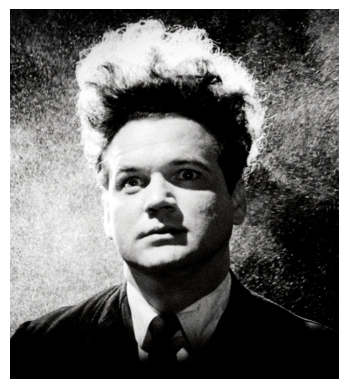

In [7]:
original = cv2.imread("eraserhead.png", cv2.IMREAD_UNCHANGED)
display(original)
faces = face_detection(original)

1 face detected in the image


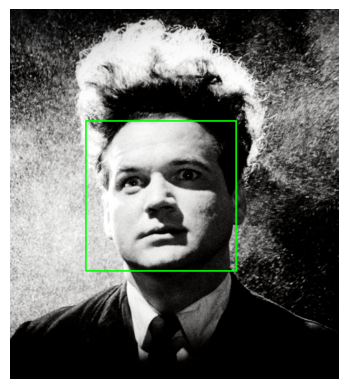

In [8]:
roi = face_roi(original, faces)
display(roi)
#_ = cv2.imwrite("eraserhead_roi.png", roi)

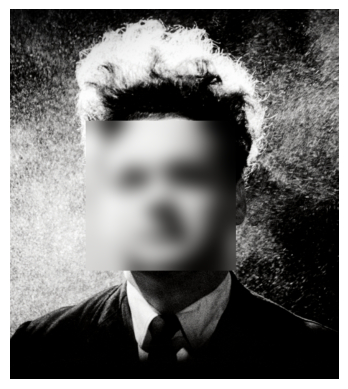

In [9]:
blurred = face_blur(original, faces, ksize=(101,101))
display(blurred)
#_ = cv2.imwrite("eraserhead_blurred.png", blurred)

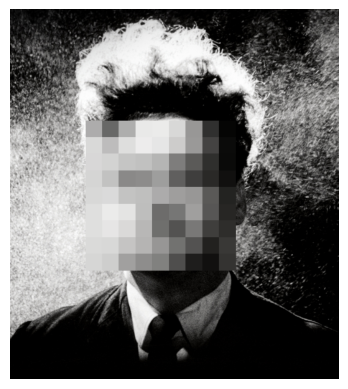

In [10]:
pixelated = face_pixelate(original, faces)
display(pixelated)
#_ = cv2.imwrite("eraserhead_pixelated.png", pixelated)

## Example 2: Group of friends

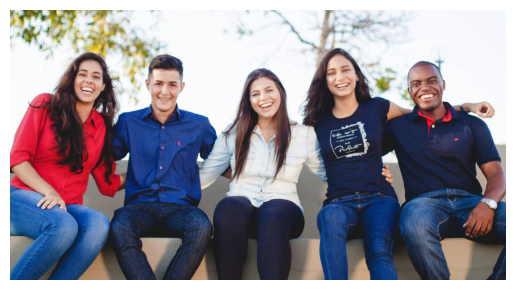

In [11]:
# Photo source: https://unsplash.com/fr/photos/groupe-de-personnes-assises-sur-un-banc-pres-darbres-en-train-de-duper-pendant-la-journee-Q_Sei-TqSlc

original = cv2.imread("group.png", cv2.IMREAD_UNCHANGED)
display(original)
faces = face_detection(original)

5 faces detected in the image


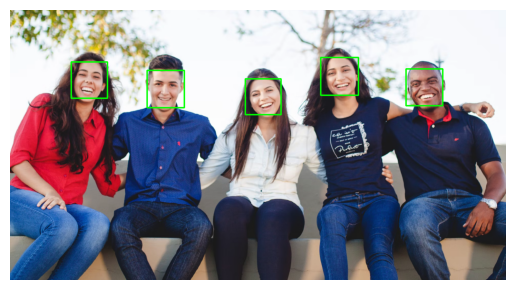

In [12]:
roi = face_roi(original, faces)
display(roi)
#_ = cv2.imwrite("group_roi.png", roi)

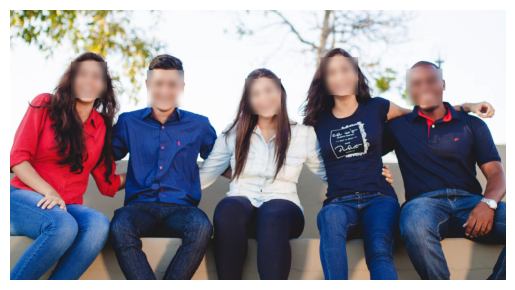

In [13]:
blurred = face_blur(original, faces, ksize=(33,33))
display(blurred)
#_ = cv2.imwrite("group_blurred.png", blurred)

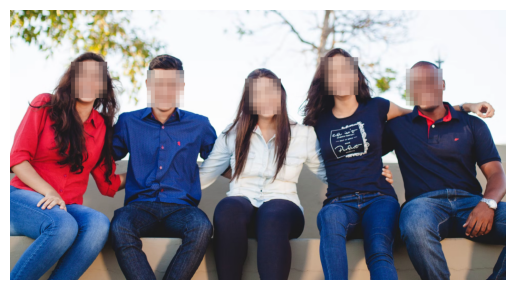

In [14]:
pixelated = face_pixelate(original, faces)
display(pixelated)
#_ = cv2.imwrite("group_pixelated.png", pixelated)

## Example 3: Group video

In [15]:
# Video source: https://github.com/intel-iot-devkit/sample-videos?tab=readme-ov-file
cap = cv2.VideoCapture('walking.mp4')

# Parameters of video output
#fourcc = cv2.VideoWriter_fourcc(*'MJPG')
#width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) 
#height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) 
#out = cv2.VideoWriter('walking_pixelated.avi', fourcc, 40.0, (width, height))

# Initialize face detector
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
 
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # grayscale
    faces = face_cascade.detectMultiScale(gray) # face detection

    #result = face_blur(frame, faces, (33,33)) # blurred
    result = face_pixelate(frame, faces) # pixellated
 
    cv2.imshow("Video", result)
    #out.write(result)
    if cv2.waitKey(1) == ord('q'):
        break
 
cap.release()
#out.release()
cv2.destroyAllWindows()

## Example 4: Live Webcam

In [16]:
cap = cv2.VideoCapture(1)

width = 640
height = 480
cap.set(cv2.CAP_PROP_FRAME_WIDTH, width) # set webcam width
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height) # set webcam height

# Parameters of video output
#fourcc = cv2.VideoWriter_fourcc(*'MJPG')
#out = cv2.VideoWriter('webcam_pixelated.avi', fourcc, 40.0, (width, height))

# Initialize face detector
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

# Read from webcam
while True:
    ret, frame = cap.read()
    if not ret:
        break
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # grayscale
    faces = face_cascade.detectMultiScale(gray) # face detection

    #result = face_blur(frame, faces, (101,101)) # blurred
    result = face_pixelate(frame, faces) # pixellated
    
    cv2.imshow("Webcam", result) # opens an independent window
    #out.write(result)
    if cv2.waitKey(1) == ord('q'):
        break
 
cap.release()
#out.release()
cv2.destroyAllWindows()

## Limits and possible improvements

In this version, face detection is accomplished thanks to Haar feature-based cascade classifiers. While it simplified implementation in this first attempt, this method has limits. They are most visible in the video examples, which inevitably contain frames where face detection is a lot more complex. The two main difficulties can be:
- Glasses (they don't *prevent* face detection but they can be a difficulty)
- Head tilt / different angle (especially when the person is moving and the facial features are less visible)

Depending on the applications for a program like this, it can be a problem if even one frame has a fault in face detection. If the purpose is to anonymise a face, and even one frame is not blurred, it could be enough to recognise someone. Of course, the Haar classifiers method is not the most advanced and could be improved, training a deep learning model for example. In order to facilitate face detection between two frames and avoid flickering (due to a head tilt or a changing angle), we could also apply object tracking to the detected face.